## Comparing Cross Sections of Different Isotopologues

In this tutorial we'll create cross sections for two isotopologues of the same molecule and overplot them to see the differences.

We strongly recommend reading the [Quick Start](https://cthulhu-xsec.readthedocs.io/en/latest/content/notebooks/quick_start.html) guide if you have not done so yet.

First, we must decide on the molecule. We choose to use two isotopologues of CO for this example, $\rm{^{12}C^{16}O}$ and $\rm{^{13}C^{16}O}$. Let's begin by downloading both line lists from ExoMol. We start by importing the relevant modules and defining some parameters. 

In [1]:
from Cthulhu.core import summon

species = 'CO'
database = 'ExoMol'

Technically, for the primary isotopologue ($\rm{^{12}C^{16}O}$), we just need to specify the molecule and database for the `species` and `database` parameters. Cthulhu will then automatically assume the main isotopologue and most complete line list to download. So we could write: 

`summon(database = database, species = species)`

However, for the purposes of the tutorial, we want to be as clear as possible with regards to the default parameters. Thus, we call the `summon` function with the `isotope` and `linelist` parameters defined. We follow the ExoMol convention for isotopologues, such that to specify the `isotope` parameter $\rm{^{12}C^{16}O}$ becomes `12C-16O`, $\rm{^{13}C^{16}O}$. becomes `13C-16O`, etc. Some molecules have multiple line lists, which you can find listed on the [ExoMol website](https://www.exomol.com/data/molecules/), and you can choose between them via the `linelist` parameter. Defining each parameter explicitly is necessary for non-main isotopologues (and is good practice regardless so that `Cthulhu` is less of a magical black box!), so we will now start specifying these parameters consistently throughout this tutorial.

In [2]:
# Download the 12C-16O line list
summon(database = database, species = species, 
       isotope = '12C-16O', linelist = 'Li2015')  


 ***** Downloading requested data from ExoMol. You have chosen the following parameters: ***** 

Molecule: CO 
Isotopologue: 12C-16O 
Line List: Li2015

Starting by downloading the .broad, .pf, and .states files...
Fetched the broadening coefficients, partition functions, and energy levels.
Now downloading the Li2015 line list...



100%|██████████| 1.40M/1.40M [00:00<00:00, 1.48MiB/s]



Converting this .trans file to HDF to save storage space...
This file took 0.4 seconds to reformat to HDF.



100%|██████████| 63.5k/63.5k [00:00<00:00, 284kiB/s]


Converting this .trans file to HDF to save storage space...
This file took 0.1 seconds to reformat to HDF.

Line list ready.



Let's do the same for the second isotopologue, $\rm{^{13}C^{16}O}$.

In [3]:
# Download the 13C-16O line list
summon(database = database, species = species, 
       isotope = '13C-16O', linelist = 'Li2015')


 ***** Downloading requested data from ExoMol. You have chosen the following parameters: ***** 

Molecule: CO 
Isotopologue: 13C-16O 
Line List: Li2015

Starting by downloading the .broad, .pf, and .states files...
Fetched the broadening coefficients, partition functions, and energy levels.
Now downloading the Li2015 line list...



100%|██████████| 1.40M/1.40M [00:00<00:00, 1.67MiB/s]



Converting this .trans file to HDF to save storage space...
This file took 0.3 seconds to reformat to HDF.

Line list ready.



Now let's compute the cross section for both isotopologues, at a pressure of 1 bar and temperature of 1000 K.

In [4]:
from Cthulhu.core import compute_cross_section

P = 1.0                        # Pressure in bars
T = 1000.0                     # Temperature in Kelvin
input_directory = './input/'   # Top level directory containing line lists

# Make cross section for 12C-16O
compute_cross_section(species = species, database = database, 
                      isotope = '12C-16O', linelist = 'Li2015',
                      temperature = T, pressure = P, 
                      input_dir = input_directory)

# Make cross section for 13C-16O
compute_cross_section(species = species, database = database, 
                      isotope = '13C-16O', linelist = 'Li2015',
                      temperature = T, pressure = P,
                      input_dir = input_directory)

Beginning cross-section computations...
Loading ExoMol format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 4.850801024003886 s
Pre-computation steps complete
Generating cross section for CO (12C-16O) at P = 1.0 bar, T = 1000.0 K
Computing transitions from E2.h5 | 0.0% complete
Completed 6474 transitions in 1.6815788239982794 s
Computing transitions from Li2015.h5 | 50.0% complete
Completed 125496 transitions in 1.0924171730002854 s
Calculation complete!
Completed 131970 transitions in 2.775091424002312 s

Total runtime: 10.596853234004811 s
Beginning cross-section computations...
Loading ExoMol format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 4.51768789900234 s
Pre-computation steps complete
Generating cross section for CO (13C-16O) at P = 1.0 bar, T = 1000.0 K
Computing transitions from Li2015.h5 | 0.0% complete
Completed 125496 transitions in 1.1082590379955946 s
Calculation complete!
Completed 12549

Finally, we are ready to plot. First, we import the relevant functions. Then, we read in the cross section files into arrays. 

Next, we create an empty array called `cross_sections` that will contain all of our cross sections. We add the $\rm{^{12}C^{16}O}$ cross section to this empty collection of cross sections. This is done by calling the `cross_section_collection` function with the data of the new cross section (`nu` and `sigma`) along with the `cross sections` parameter. We call this statement a second time, this time with `nu2` and `sigma2`, to add the $\rm{^{13}C^{16}O}$ cross section to the collection as well. By passing in the `collection = cross_sections` parameter every time, we ensure that all of our cross sections are added to the same collection, to make the plotting easier in the next part.

In [6]:
from Cthulhu.misc import read_cross_section_file, cross_section_collection

# Read in the cross sections we just computed
nu, sigma = read_cross_section_file(species = species, database = database,
                                    filename = 'CO_T1000.0K_log_P0.0_H2-He_sigma.txt')
nu2, sigma2 = read_cross_section_file(species = species, database = database, 
                                      isotope = '13C-16O', linelist = 'Li2015', 
                                      filename = 'CO_T1000.0K_log_P0.0_H2-He_sigma.txt')

# Generate an empty collection object for plotting
cross_sections = []

# Add first cross section to collection
cross_sections = cross_section_collection(new_x = nu, new_y = sigma, collection = cross_sections)

# Add second cross section to collection, making sure to specify the previous collection as a parameter
cross_sections = cross_section_collection(new_x = nu2, new_y = sigma2, collection = cross_sections)

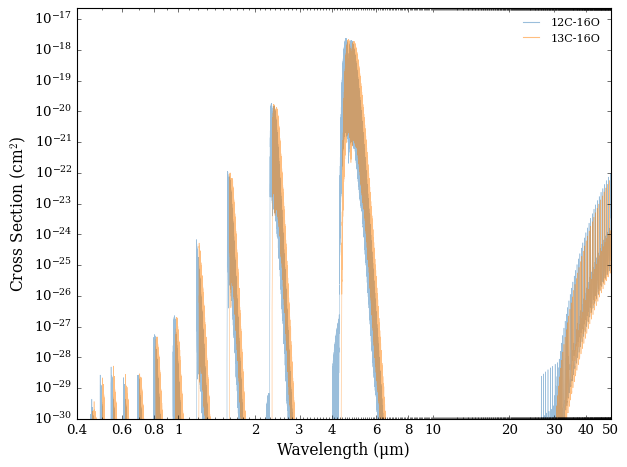

In [7]:
from Cthulhu.plot import plot_cross_section

# Plot both cross sections
plot_cross_section(collection = cross_sections, 
                   labels = ['12C-16O', '13C-16O'], 
                   filename = 'Different_Isotopologues_of_CO',
                   y_min = 1.0e-30)

Looks at that band shift! Who would have thought that a small change in the nuclear mass of Carbon could cause such a huge change? 🤔

Let's zoom in to take a closer look... 🔍

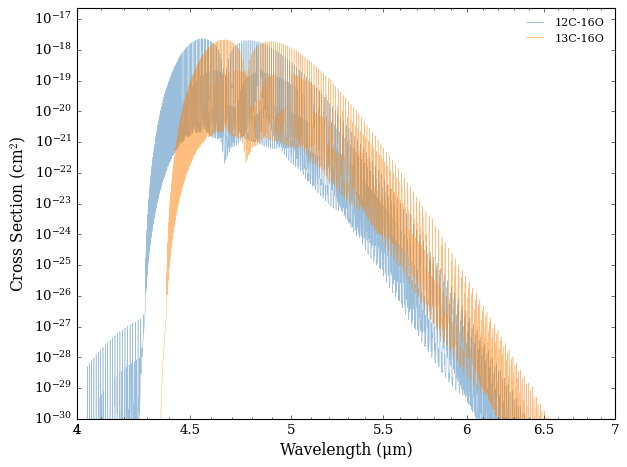

In [9]:
plot_cross_section(collection = cross_sections, 
                   labels = ['12C-16O', '13C-16O'], 
                   filename = 'Different_Isotopologues_of_CO_Zoomed',
                   y_min = 1.0e-30,
                   x_min = 4, x_max = 7,       # Min and max wavelengths in microns
                   )